<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Proyecto 2: Análisis de señales ECG</center></font></h1>
<h3><font color='black'>

   María Paulina Arias Castillo - 1193085377
   
   Andrea Carolina Espinosa Villadiego - 1003399277


# Metodologías de artículos

## Enfoque óptimo de clasificación de arritmias en múltiples etapas [1]



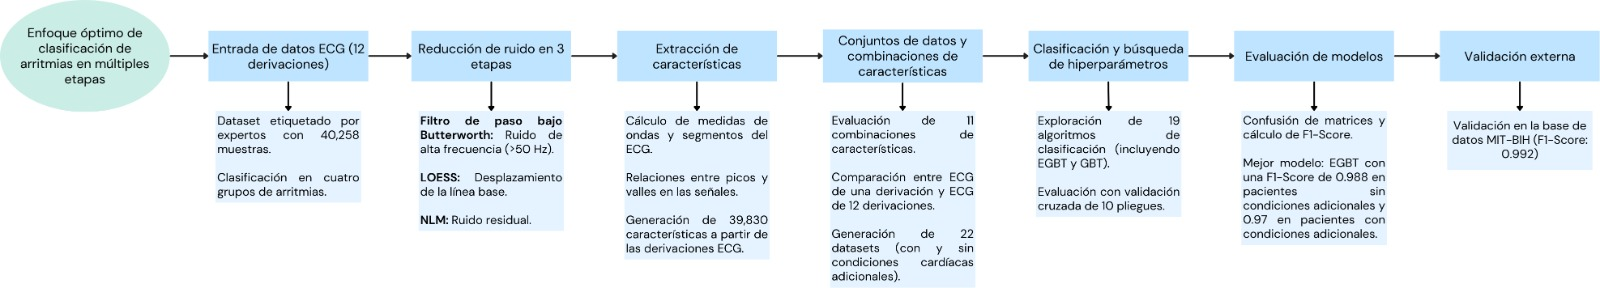

El enfoque propuesto para la clasificación de arritmias basado en ECG de 12 derivaciones se compone de varias etapas. Inicialmente, se aplican técnicas de reducción de ruido en tres etapas: filtro de paso bajo Butterworth, suavizado robusto LOESS y el algoritmo de suavizado "Non-Local Means" (NLM). Luego, se implementa un método novedoso de extracción de características, que incluye relaciones entre picos y valles, y transformaciones distribucionales de estas características. Estas características se usan para entrenar múltiples algoritmos de clasificación.

El estudio comparó miles de algoritmos de clasificación utilizando un exhaustivo análisis de combinaciones de hiperparámetros. Las pruebas se realizaron en un conjunto de datos propio de ECG, etiquetado por expertos, que incluye 40,258 pacientes con cuatro clases de arritmias (fibrilación auricular, taquicardia supraventricular, bradicardia sinusal y ritmo sinusal). Se evaluaron dos grupos de datos: pacientes con y sin condiciones cardíacas adicionales. Los mejores resultados se obtuvieron con un modelo de "Extreme Gradient Boosting Tree" (EGBT), alcanzando una F1-Score de 0.992 en el conjunto de validación externa (MIT-BIH).

## Predicción de fibrilación auricular a partir de señales de ECG de una sola derivación obtenidas en el hogar sin arritmias [2]



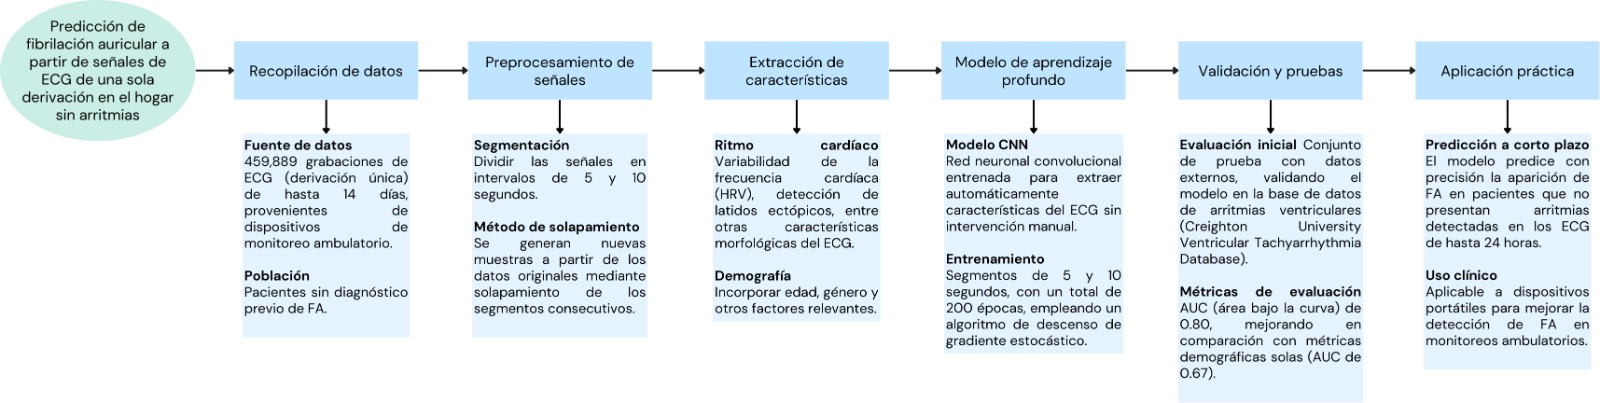

En el trabajo se presenta una forma de antelar la aparición de fibrilación auricular (FA) en un periodo de dos semanas, utilizando registros de electrocardiogramas (ECG) que se obtuvieron a través de dispositivos portátiles con una única derivación. Se analizaron más de 450,000 registros de ECG tomados durante un máximo de 14 días en personas sin un diagnóstico previo de FA. El modelo combina datos del ritmo cardíaco y factores demográficos, aplicando un método de aprendizaje profundo para procesar y analizar las señales de manera eficiente.

El proceso comienza con la extracción automática de diversas características a partir de segmentos de 10 minutos de los ECG, como la variabilidad de la frecuencia cardíaca (HRV), la detección de latidos irregulares y otras alteraciones en el ritmo. También se analizan las formas de onda del ECG, todo ello gestionado por el modelo de aprendizaje profundo. A continuación, se utilizan diferentes ventanas temporales para estimar el riesgo de FA, y se incorporan variables como la edad y el sexo para mejorar la precisión de la predicción.

Este modelo se estimo con diversas configuraciones de entrada y ventanas de tiempo, desde periodos de 10 minutos hasta 24 horas, de esto se conluyo que una mayor cantidad de grabaciones mejora la precisión de predicción del modelo.

Por último, el riesgo de FA se ajusto mediante un proceso de calibración, lo que permitió unificar las predicciones para los diferentes grupos de edad, proporcionando una interpretación coherente del riesgo en todos los casos.


## Un enfoque de clasificación de arritmias mediante aprendizaje profundo utilizando ECG de una sola derivación sin detección de ondas QRS [3]



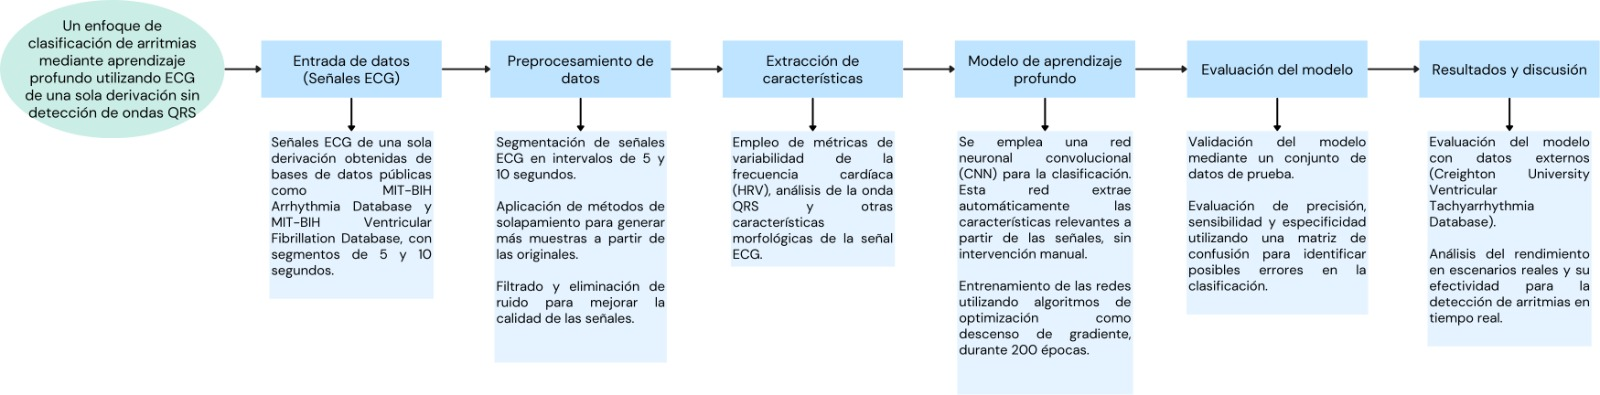

El estudio emplea una metodología de deep learning para clasificar arritmias usando señales de ECG de una sola derivación, sin necesidad de detectar la onda QRS. Para ello, se utilizaron datos de tres bases públicas: MIT-BIH Arrhythmia Database, Atrial Fibrillation Database y MIT-BIH Ventricular Fibrillation Database, las cuales contienen señales cardíacas en formato de una sola derivación. Como paso inicial, las señales se segmentaron en intervalos de 5 y 10 segundos. Para obtener más muestras, se aplicó un método de solapamiento entre segmentos consecutivos, generando nuevas muestras a partir de las señales originales.

Se diseño una red neuronal convolucional (CNN) con el uso de varias capas de con volucion y capas de Max Poolingque, esto permitio que el modelo pudiera identificar diferentes patrones sin la necesidad de la participación humana. Esta red neuronal permitio la clasificación de las señales de ECG y que permitio la extracción automatica de las caracteristicas más importantes de estas señales.

El modelo se entreno con segmentos entre los 5 y 10 segundos y se aplico un algoritmo de descenso de gradiente estocástico, el entrenamiento se hizo durante 200 épocas y luego se valido a través de un conjunto de prueba.

El modelo se valido con una base de datos externa (Creighton University Ventricular Tachyarrhythmia Database), el objetivo fue medir su capacidad para clasificar ritmos cardíacos en datos nunca antes vistos durante el entrenamiento. Su desempeño fue evaluado con métricas de precisión, sensibilidad y especificidad, así como con una matriz de confusión para identificar posibles errores en la clasificación de diferentes tipos de arritmias. De esto se concluyó que el modelo basado en segmentos de 5 segundos es más efectivo en situaciones de emergencia y para dispositivos de monitoreo cardíaco portátiles, ya que permite una detección más rápida de las arritmias.

## Carga de datos

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [110]:
# Se carga el archivo de Excel
file_path = '/content/drive/MyDrive/Diagnostics.xlsx'
df = pd.read_excel(file_path)


## Filtrado de las enfermedades de interés (AFIB Y SB)

In [ ]:
df_SB_AFIB = df[df['Rhythm'].isin(['AFIB','SB'])]
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df_SB_AFIB

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
5,MUSE_20180112_120347_79000,SB,NONE,46,FEMALE,57,57,70,404,393,38,24,9,225,260,427
6,MUSE_20180114_075026_69000,AFIB,TWC,80,FEMALE,98,86,74,360,459,69,83,17,215,252,395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9897,MUSE_20180114_134724_10000,SB,LVHV,56,FEMALE,56,56,88,444,428,49,62,9,219,263,441
9900,MUSE_20180113_122544_20000,SB,NONE,38,FEMALE,56,56,88,434,418,69,54,10,218,262,435
9902,MUSE_20180114_074720_85000,SB,NONE,55,FEMALE,57,57,94,414,402,-4,1,10,212,259,419
9903,MUSE_20180115_131524_93000,AFIB,RBBB TWC,70,MALE,93,82,130,386,479,61,194,15,225,290,418


## Filtrar solo datos correspondientes a la derivación II

In [ ]:
nombres_filtrados = df_SB_AFIB['FileName'].str.strip().str.lower().tolist()
nombres_filtrados = [f"{name}.csv" if not name.endswith(".csv") else name for name in nombres_filtrados]
data_by_file_sb = {}
data_by_file_afib = {}

folder_path = '/content/drive/MyDrive/ECGDataDenoised'

dfs_sb = []
dfs_afib = []

for filename in os.listdir(folder_path):
    filename_clean = filename.strip().lower()

    if filename_clean in nombres_filtrados:
        file_path = os.path.join(folder_path, filename)
        file_index = nombres_filtrados.index(filename_clean)
        ritmo = df_SB_AFIB.iloc[file_index]['Rhythm'].lower()

        # Se verifica si el archivo está vacío antes de leer
        if os.stat(file_path).st_size > 0:
            try:

                df = pd.read_csv(file_path, header=None)
                df.columns = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

                df.insert(0, 'FileName', filename)
                df.insert(1, 'Ritmo', ritmo)
                selected_df = df[['FileName', 'Ritmo', 'II']]

                #Se guarda los datos de la columna 'II' en una lista asociada al nombre del archivo
                data_column_ii = selected_df['II'].tolist()

                # Dependiendo del ritmo, se añade al DataFrame correspondiente
                if ritmo == 'sb':
                    data_by_file_sb[filename] = data_column_ii
                    dfs_sb.append(pd.DataFrame({'FileName': filename, 'II': [data_column_ii]}))
                elif ritmo == 'afib':
                    data_by_file_afib[filename] = data_column_ii
                    dfs_afib.append(pd.DataFrame({'FileName': filename, 'II': [data_column_ii]}))
            except pd.errors.EmptyDataError:
                print(f"Advertencia: El archivo {filename} está vacío o no tiene datos válidos.")
        else:
            print(f"Advertencia: El archivo {filename} está vacío y ha sido omitido.")


if len(dfs_sb) == 0 and len(dfs_afib) == 0:
    print("No se encontraron archivos coincidentes o válidos.")
else:

    df_SB= pd.concat(dfs_sb, ignore_index=True) if len(dfs_sb) > 0 else None
    df_AFIB = pd.concat(dfs_afib, ignore_index=True) if len(dfs_afib) > 0 else None

# 3. Programar las fórmulas 1 al 4 que se encuentran en el artículo (15%). Consultar que significado y utilidad del biespectro (Realice la gráfica) (5%)

https://arxiv.org/pdf/1809.08451

## Detrending lineal



A lo largo del desarrollo del proyecto, la función detrending se empleará directamente a partir de la librería NumPy de Python.

## Compression

$$ s(t_k) = \frac{c(t_k) - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}} $$



In [ ]:
def compression(serie):
    xmin = serie.min()
    xmax = serie.max()
    num = serie-xmin
    den = xmax - xmin
    comp = num/den
    return comp

## Biespectro y bicoherencia
#### **Biespectro:**

El biespectro es una técnica de análisis espectral de segunda orden que examina las correlaciones entre las fases de diferentes frecuencias. A diferencia del espectro de potencia (que solo captura información de magnitudes de las frecuencias), el biespectro incluye información sobre la fase y puede identificar interacciones no lineales entre las señales [4].

Se usa para detectar la presencia de no linealidades o interacciones en las señales y, en particular, tiene la capacidad de identificar procesos de fase acoplada y asimetrías en los datos. También puede servir para evitar problemas de sesgo que aparecen cuando se utilizan métodos tradicionales de análisis espectral, como el espectro de potencia [4]

$$
b(f_1,f_2) = \sum_{j=1}^{N} X_j(f_1) X_j(f_2) X_j^*(f_1 + f_2)
$$

#### **Bicoherencia:**

La forma normalizada del bispectro se llama bicoherencia, y sus medidas pueden mostrar tendencias detectables al diferenciar conjuntos de datos.

$$
B(f_1,f_2) = \frac{\left|\sum_{j=1}^{N} X_j(f_1) X_j(f_2) X_j^*(f_1 + f_2)\right|}{\sum_{j=1}^{N} \left| X_j(f_1) X_j(f_2) X_j^*(f_1 + f_2) \right|}
$$





In [111]:

def biespectro_bicoherencia(signal,fs,p_seg):
    seg=[]
    index = range(0, len(signal) - p_seg + 1, p_seg) #El código divide la señal en segmentos consecutivos de longitud
    for i in index: #Utiliza un rango para recorrer la señal y extrae segmentos con una longitud de 500 puntos cada uno.
        segmento = signal[i:i+ p_seg]
        seg.append(segmento)
    seg = np.array(seg)
    num_segments = seg.shape[0]
    fft_segments = np.fft.fft(seg, n=p_seg, axis=1) #Se aplica la FFT a cada segmento
    fft_segments = fft_segments[:, :p_seg // 2] #se extrae solo la mitad de las frecuencias (debido a la simetría de la FFT de señales reales).

    Biespectro = np. zeros((p_seg // 2, p_seg // 2), dtype=complex) # Matriz cuadrada
    B2= np.zeros((p_seg // 2, p_seg // 2), dtype=complex) #Matriz cuadrada de tamaño p/2, p/2

    # la fft me saca las frecuencias de cada segmento, el biespectro combina los productos de las frecuencias y las suma
    for k in range(num_segments):
        S=fft_segments[k, :]
        for f1 in range(p_seg // 2):
            for f2 in range(p_seg //2 - f1):
                f3= f1+ f2
                Biespectro[f1, f2] += S[f1] * S[f2] * np.conj(S[f3]) #Suma compleja de los productos de las frecuencias.
                B2[f1, f2] += np.abs(S[f1] * S[f2] * np.conj(S[f3])) #Suma de las magnitudes absolutas de los productos de frecuencias.
    Bicoherencia=np.abs(Biespectro)/B2 #valor absoluto del biespectro dividido por B2 (evitando las contribuciones no coherentes de las frecuencias).
    return Bicoherencia

## Simetría de la bicoherencia

In [ ]:
def simetria_bicoherencia(Bicoherencia):
    #rellena simetria_bicoherencia con valores de la matriz Bicoherencia, pero solo en ciertas posiciones que siguen una restricción en los índices.
    simetria_bicoherencia = np.zeros((10, 20)) #Matriz vacía inicialmente llena de ceros
    for f1 in range(20):  # (f1) recorre las primeras 20 filas.
        for f2 in range(f1, 20 - f1): # (f2) toma valores que dependen de f1, restringiendo los índices para que no crucen ciertos límites de simetría.
            simetria_bicoherencia[f1, f2] = Bicoherencia[f1, f2]
    return simetria_bicoherencia # la matriz simetria_bicoherencia, que es una porción extraída de la matriz original de bicoherencia, posiblemente simétrica debido a la restricción en los índices.

## Frecuencia de máxima potencia

In [ ]:
def maxima_potencia(signal, fs):

    ftt = np.fft.fft(signal)
    power = np.abs(ftt)**2
    power = power[:len(power)//2]
    frecuencias = np.fft.fftfreq(len(signal), 1/fs)
    frecuencias = frecuencias[:len(frecuencias)//2]
    idx_max = np.argmax(power)
    frecuencia_maxima_potencia = frecuencias[idx_max]
    potencia_max = power[idx_max]
    return frecuencias, power , frecuencia_maxima_potencia

# Procesamiento de datos de sujetos con Bradicardia sinusal (SB) y fibrilación auricular (AFIB)

En primer lugar, se aplica un detrending lineal a las señales, la cual es una técnica de preprocesamiento de datos que se utiliza para eliminar la tendencia subyacente en una serie de tiempo con el fin de identificar patrones más sutiles y variaciones estacionales o cíclicas de los datos, además de aumentar la precisión de los modelos y facilitar el análisis de frecuencias [5].

Seguidamente, se aplica la función de compresión a la señal con el fin de reducir su rango dinámico, es decir, la diferencia entre los valores más altos y bajos, normalizando los valores de la serie y facilitando su análisis y comparación. Esta técnica puede añadir un nivel DC a la señal, por lo que, por último, se les volvió a aplicar un detrending lineal para mantener la integridad de los datos en el análisis posterior [6].


### Aplicación del primer detrend - SB

In [112]:
df_SB['II_detrended'] = df_SB['II'].apply(signal.detrend)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_rows', 5)

### Aplicación función de compresión - SB

In [113]:
df_SB['II_compressed'] = df_SB['II_detrended'].apply(lambda x: compression(pd.Series(x)).tolist())
pd.set_option('display.max_colwidth', 50)

### Aplicación segundo detrend - SB

In [114]:
df_SB['II_detrended_compressed'] = df_SB['II_compressed'].apply(signal.detrend)
pd.set_option('display.max_colwidth', 50)

## Dataframe datos SB procesados

In [ ]:
DataFrameSB= pd.DataFrame(df_SB)
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.max_rows', 10)
DataFrameSB

,FileName,II,II_detrended,II_compressed,II_detrended_compressed
0,MUSE_20180119_173107_52000...,"[53.037, 70.699, 87.524, 1...","[8.200559697206842, 25.862...","[0.16103658580314084, 0.17...","[0.006875713784724652, 0.0..."
1,MUSE_20180119_173109_64000...,"[-37.999, -40.683, -42.777...","[-41.23593396994471, -43.9...","[0.49838862648673743, 0.49...","[-0.030085311163922768, -0..."
2,MUSE_20180119_173110_69000...,"[-0.58392, -0.85411, -1.04...","[-2.019765221361725, -2.28...","[0.5211812905987395, 0.521...","[-0.0011662121611072385, -..."
3,MUSE_20180119_173112_86000...,"[-44.318, -23.638, -5.7342...","[-78.38088075317835, -57.6...","[0.374536073241138, 0.4028...","[-0.10739492262881561, -0...."
4,MUSE_20180119_173149_13000...,"[277.86, 267.28, 257.29, 2...","[243.4753935086632, 232.89...","[0.4264970312796053, 0.416...","[0.23014178185978373, 0.22..."
...,...,...,...,...,...
3884,MUSE_20180112_122630_97000...,"[-8.8094, -8.8793, -9.505,...","[-41.99844199749248, -42.0...","[0.10850997257193347, 0.10...","[-0.048947566932074596, -0..."
3885,MUSE_20180112_122633_06000...,"[14.797, 15.528, 15.573, 1...","[-28.4972892495031, -27.76...","[0.06401285851942073, 0.06...","[-0.02647064984820119, -0...."
3886,MUSE_20180112_122717_13000...,"[32.846, 31.697, 30.955, 3...","[-19.990681756888385, -21....","[0.09397511298304674, 0.09...","[-0.016066614535710386, -0..."
3887,MUSE_20180112_122719_27000...,"[19.13, 18.449, 16.789, 13...","[-0.27074853524697673, -0....","[0.6262515501883552, 0.625...","[-0.0003507256473544995, -..."


## Gráficación del procesamiento realizado para los datos de un sujeto con SB

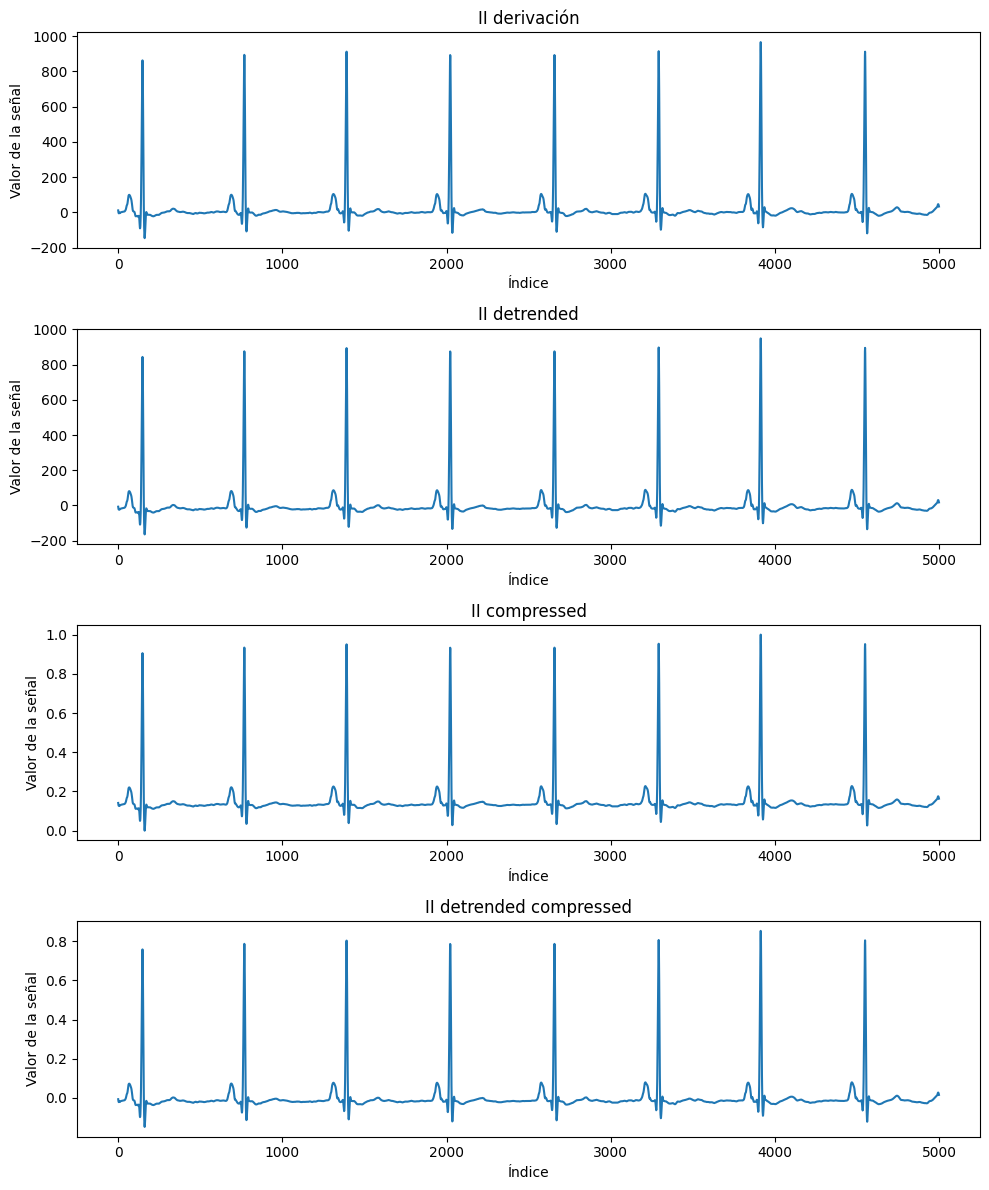

In [ ]:

archivo_especifico = "MUSE_20180111_160033_11000.csv"
sujeto_filtrado = DataFrameSB[DataFrameSB['FileName'] == archivo_especifico]

plt.figure(figsize=(10, 12))

# 'II derivación'
plt.subplot(4, 1, 1)
plt.plot(sujeto_filtrado['II'].iloc[0])
plt.title('II derivación')
plt.xlabel('Índice')
plt.ylabel('Valor de la señal')

# 'II detrended'
plt.subplot(4, 1, 2)
plt.plot(sujeto_filtrado['II_detrended'].iloc[0])
plt.title('II detrended')
plt.xlabel('Índice')
plt.ylabel('Valor de la señal')

# 'II compressed'
plt.subplot(4, 1, 3)
plt.plot(sujeto_filtrado['II_compressed'].iloc[0])
plt.title('II compressed')
plt.xlabel('Índice')
plt.ylabel('Valor de la señal')

# 'II detrended compressed'
plt.subplot(4, 1, 4)
plt.plot(sujeto_filtrado['II_detrended_compressed'].iloc[0])
plt.title('II detrended compressed')
plt.xlabel('Índice')
plt.ylabel('Valor de la señal')

plt.tight_layout()
plt.show()

### Aplicación primer detrend - AFIB

In [115]:
df_AFIB['II_detrended'] = df_AFIB['II'].apply(lambda x: signal.detrend(x))
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_rows', 5)

### Aplicación funcion de compresión - AFIB

In [116]:
df_AFIB['II_compressed'] = df_AFIB['II_detrended'].apply(lambda x: compression(pd.Series(x)).tolist())
pd.set_option('display.max_colwidth', 50)

### Aplicación segundo detrend - AFIB

In [117]:
df_AFIB['II_detrended_compressed'] = df_AFIB['II_compressed'].apply(lambda x: signal.detrend(x))
pd.set_option('display.max_colwidth', 50)

## Dataframe datos AFIB procesados

In [ ]:
DataFrameAFIB= pd.DataFrame(df_AFIB)
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.max_rows', 10)
DataFrameAFIB

,FileName,II,II_detrended,II_compressed,II_detrended_compressed
0,MUSE_20180712_155838_47000...,"[-64.827, -20.469, 22.279,...","[-108.09601449313615, -63....","[0.1196180192324831, 0.143...","[-0.05768676019836842, -0...."
1,MUSE_20180712_155842_73000...,"[24.921, 15.081, 5.9911, -...","[-5.6312466246577415, -15....","[0.09108170350615159, 0.07...","[-0.007714110270199859, -0..."
2,MUSE_20180712_155925_33000...,"[63.204, 61.587, 59.563, 5...","[56.45957376447199, 54.844...","[0.5756457208283081, 0.574...","[0.04808939565734316, 0.04..."
3,MUSE_20180712_155940_31000...,"[66.679, 67.14, 66.967, 65...","[27.192811373963572, 27.65...","[0.14965136246984614, 0.15...","[0.02792878012158799, 0.02..."
4,MUSE_20180712_155948_55000...,"[101.33, 82.618, 62.371, 4...","[73.7582528217781, 55.0484...","[0.2961271806730621, 0.273...","[0.09005714494221528, 0.06..."
...,...,...,...,...,...
1775,MUSE_20180112_122301_59000...,"[-26.263, -47.093, -65.591...","[-44.398812747380916, -65....","[0.27907422179526775, 0.25...","[-0.05573285529540001, -0...."
1776,MUSE_20180112_122302_66000...,"[13.211, 11.777, 8.7459, 3...","[-2.732355974333565, -4.16...","[0.27307180794493885, 0.27...","[-0.003592685644586535, -0..."
1777,MUSE_20180112_122304_77000...,"[-15.493, -25.164, -32.743...","[-30.429322251331534, -40....","[0.2337661153602951, 0.221...","[-0.03718862201215781, -0...."
1778,MUSE_20180112_122547_34000...,"[237.91, 164.28, 97.318, 4...","[199.95081973533127, 126.3...","[0.3502327904680523, 0.278...","[0.19558029457421874, 0.12..."


## Gráficación del procesamiento realizado para los datos de un sujeto con AFIB



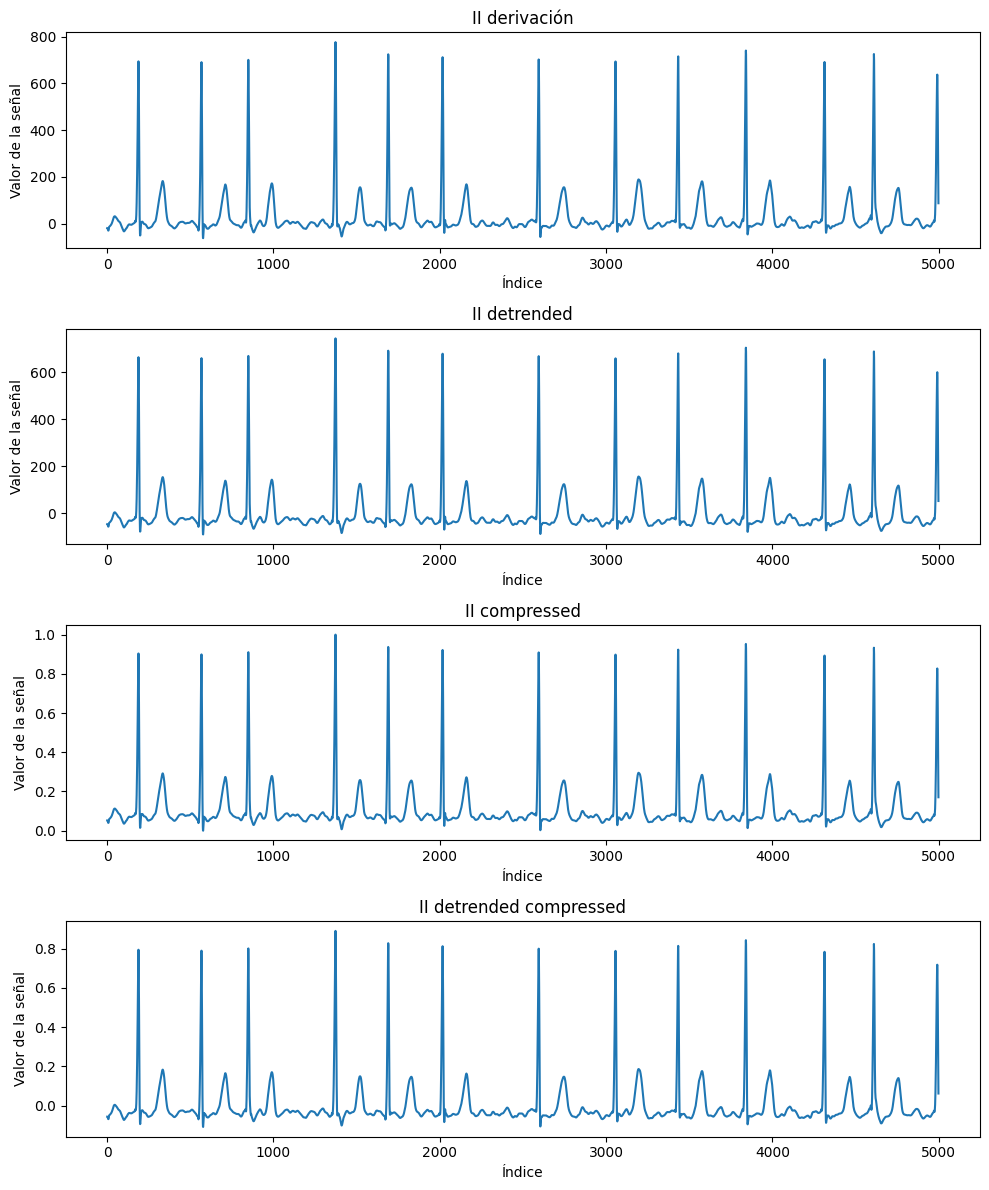

In [ ]:

archivo_especifico = "MUSE_20180111_160053_89000.csv"
sujeto_filtrado = DataFrameAFIB[DataFrameAFIB['FileName'] == archivo_especifico]

plt.figure(figsize=(10, 12))

# 'II derivación'
plt.subplot(4, 1, 1)
plt.plot(sujeto_filtrado['II'].iloc[0])
plt.title('II derivación')
plt.xlabel('Índice')
plt.ylabel('Valor de la señal')

# 'II detrended'
plt.subplot(4, 1, 2)
plt.plot(sujeto_filtrado['II_detrended'].iloc[0])
plt.title('II detrended')
plt.xlabel('Índice')
plt.ylabel('Valor de la señal')

# 'II compressed'
plt.subplot(4, 1, 3)
plt.plot(sujeto_filtrado['II_compressed'].iloc[0])
plt.title('II compressed')
plt.xlabel('Índice')
plt.ylabel('Valor de la señal')

# 'II detrended compressed'
plt.subplot(4, 1, 4)
plt.plot(sujeto_filtrado['II_detrended_compressed'].iloc[0])
plt.title('II detrended compressed')
plt.xlabel('Índice')
plt.ylabel('Valor de la señal')

plt.tight_layout()
plt.show()

## **Bicoherencia**

El mapa de bicoherencia proporciona una visión de la relación entre diferentes componentes de frecuencia en las señales del electrocardiograma (ECG). Los colores más cálidos (amarillo, verde) indican una mayor coherencia o relación entre las frecuencias, mientras que los colores más fríos (azul, morado) indican una menor coherencia.

Para graficar la bicoherencia, se tomó el promedio de los resultados de 15 sujetos para los estados de SB (Bradicardia Sinusal) y AFIB (Fibrilación Auricular). Esta decisión fue tomada por la limitación en la capacidad computacional, que impidió procesar un mayor número de muestras de manera eficiente. Además, promediar los datos de estos 15 sujetos permite obtener una representación más robusta y consistente del comportamiento de la bicoherencia en cada grupo, reduciendo la influencia de variaciones individuales extremas.

Este tamaño de muestra, aunque relativamente pequeño, mostró en los resultados ser adecuado para capturar las principales tendencias y patrones comunes en la señal ECG de los pacientes con la misma condición. A través del promedio, se busca observar cómo varía la bicoherencia de manera generalizada en cada grupo, proporcionando una visión más estable del comportamiento de la señal, sin el ruido que podría introducirse al analizar sujetos individualmente, lo cual resulta importante para identificar diferencias fundamentales entre SB y AFIB en términos de coherencia en las señales eléctricas cardíacas.


## Graficación de la bicoherencia promedio de 15 sujetos con SB

In [ ]:

# Parámetros para la función
fs = 1
p_seg = 500

# Se crea una lista para almacenar las bicoherencias de cada archivo
bicoherencias_SB_15 = []
num_archivos = 15  # Número de archivos a procesar

# Se iterar sobre cada fila seleccionada del DataFrame (los primeros 15 archivos)
for idx, row in DataFrameSB.iloc[:num_archivos].iterrows():

    signal = row['II_detrended_compressed']  # Extraer la señal de la columna 'II'

    # Aplicar la función de biespectro y bicoherencia
    Biespectro_SB_15, Bicoherencia_SB_15 = biespectro_bicoherencia(signal, fs, p_seg)


    bicoherencias_SB_15.append(Bicoherencia_SB_15)


bicoherencias = np.array(bicoherencias_SB_15)

bicoherencia_promedio_SB_15 = np.mean(bicoherencias, axis=0)

print(len(bicoherencia_promedio_SB_15))
print("Bicoherencia promedio por posición:", bicoherencia_promedio_SB_15)


<ipython-input-11-4c797c3a6419>:23: RuntimeWarning: invalid value encountered in divide
  Bicoherencia=np.abs(Biespectro)/B2 #valor absoluto del biespectro dividido por B2 (evitando las contribuciones no coherentes de las frecuencias).


250
Bicoherencia promedio por posición: [[0.57311967 +0.j 0.35567584 +0.j 0.31260443 +0.j ... 0.59913615 +0.j
  0.59163952 +0.j 0.61681957 +0.j]
 [0.35567584 +0.j 0.82429867 +0.j 0.87985918 +0.j ... 0.81183974 +0.j
  0.80790716 +0.j        nan+nanj]
 [0.31260443 +0.j 0.87985918 +0.j 0.68793966 +0.j ... 0.62044422 +0.j
         nan+nanj        nan+nanj]
 ...
 [0.59913615 +0.j 0.81183974 +0.j 0.62044422 +0.j ...        nan+nanj
         nan+nanj        nan+nanj]
 [0.59163952 +0.j 0.80790716 +0.j        nan+nanj ...        nan+nanj
         nan+nanj        nan+nanj]
 [0.61681957 +0.j        nan+nanj        nan+nanj ...        nan+nanj
         nan+nanj        nan+nanj]]


In [ ]:
Bic_sim_SB_15 = simetria_bicoherencia(bicoherencia_promedio_SB_15)


10


<ipython-input-12-f8e7bd917c11>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  simetria_bicoherencia[f1, f2] = Bicoherencia[f1, f2]


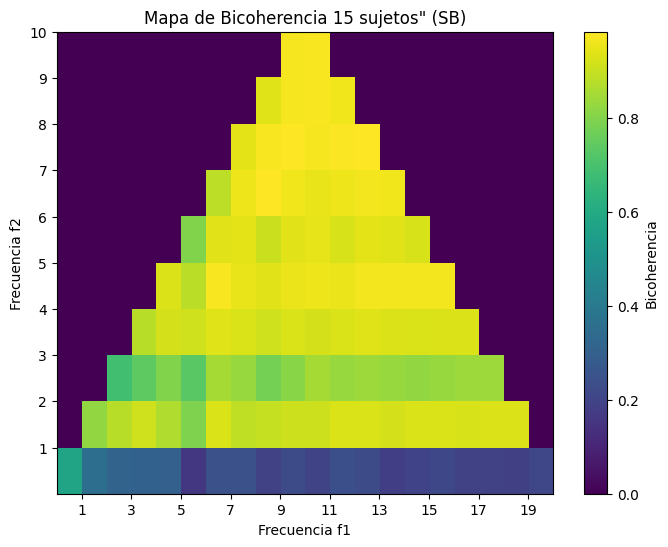

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(Bic_sim_SB_15, extent=(0, 20, 0, 10), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Bicoherencia')
plt.title('Mapa de Bicoherencia 15 sujetos" (SB)')
plt.xlabel('Frecuencia f1')
plt.ylabel('Frecuencia f2')
plt.xticks(np.arange(1, 21, 2))
plt.yticks(np.arange(1, 11, 1))
plt.grid(False)
plt.show()

El gráfico de bicoherencia en la bradicardia sinusal (SB) se caracteriza por ser simétrico y compacto, lo que indica que las interacciones entre las diferentes frecuencias son más estables y siguen patrones armónicos. Esto se puede relacionar con el ritmo más lento y regular de la bradicardia, donde el corazón sigue un patrón uniforme y predecible [7].



## Graficación de la bicoherencia promedio de 15 sujetos con AFIB

In [ ]:
# Parámetros para la función
fs = 1
p_seg = 500

# Se crea una lista para almacenar las bicoherencias de cada archivo
bicoherencias_AFIB_15 = []
num_archivos = 15  # Número de archivos a procesar

# Se iterar sobre cada fila seleccionada del DataFrame
for idx, row in DataFrameAFIB.iloc[:num_archivos].iterrows():

    signal = row['II_detrended_compressed']  # Extraer la señal de la columna 'II'

    # Aplicar la función de biespectro y bicoherencia
    Biespectro_AFIB_15, Bicoherencia_AFIB_15 = biespectro_bicoherencia(signal, fs, p_seg)
    bicoherencias_AFIB_15.append(Bicoherencia_AFIB_15)

bicoherencias = np.array(bicoherencias_AFIB_15)

bicoherencia_promedio_AFIB_15 = np.mean(bicoherencias, axis=0)

print("Bicoherencia promedio por posición:", bicoherencia_promedio_AFIB_15)


<ipython-input-11-4c797c3a6419>:23: RuntimeWarning: invalid value encountered in divide
  Bicoherencia=np.abs(Biespectro)/B2 #valor absoluto del biespectro dividido por B2 (evitando las contribuciones no coherentes de las frecuencias).


Bicoherencia promedio por posición: [[0.30583553 +0.j 0.29585355 +0.j 0.43587627 +0.j ... 0.47050345 +0.j
  0.49292472 +0.j 0.47196688 +0.j]
 [0.29585355 +0.j 0.51104356 +0.j 0.68990564 +0.j ... 0.45438826 +0.j
  0.47260478 +0.j        nan+nanj]
 [0.43587627 +0.j 0.68990564 +0.j 0.73344001 +0.j ... 0.51931554 +0.j
         nan+nanj        nan+nanj]
 ...
 [0.47050345 +0.j 0.45438826 +0.j 0.51931554 +0.j ...        nan+nanj
         nan+nanj        nan+nanj]
 [0.49292472 +0.j 0.47260478 +0.j        nan+nanj ...        nan+nanj
         nan+nanj        nan+nanj]
 [0.47196688 +0.j        nan+nanj        nan+nanj ...        nan+nanj
         nan+nanj        nan+nanj]]


In [ ]:
Bic_sim_AFIB_15 = simetria_bicoherencia(bicoherencia_promedio_AFIB_15)

<ipython-input-12-f8e7bd917c11>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  simetria_bicoherencia[f1, f2] = Bicoherencia[f1, f2]


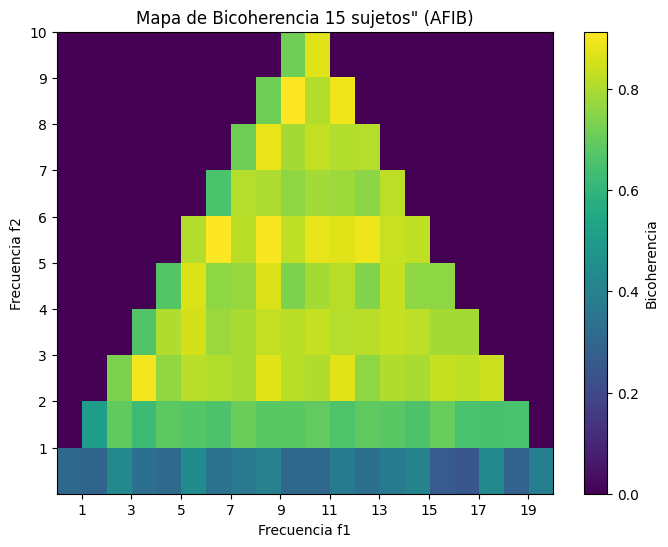

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(Bic_sim_AFIB_15, extent=(0, 20, 0, 10), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Bicoherencia')
plt.title('Mapa de Bicoherencia 15 sujetos" (AFIB)')
plt.xlabel('Frecuencia f1')
plt.ylabel('Frecuencia f2')
plt.xticks(np.arange(1, 21, 2))
plt.yticks(np.arange(1, 11, 1))
plt.grid(False)
plt.show()

La fibrilación auricular (AFib) se caracteriza por una actividad eléctrica caótica e irregular [8], lo cual se refleja claramente en su mapa de bicoherencia. En este tipo de análisis, se observan varios patrones distintivos:

* Picos de bicoherencia: En AFib, múltiples frecuencias interactúan de forma desorganizada, generando un gran número de picos en diferentes zonas del gráfico de bicoherencia. Esto sugiere una falta de sincronización entre las señales eléctricas de las aurículas.

*	Baja coherencia general: La naturaleza aleatoria de la AFib da como resultado una coherencia reducida en comparación con ritmos más regulares, como la bradicardia sinusal (SB), donde las señales son más ordenadas y consistentes.

*	Distribución dispersa de la coherencia: En lugar de estar concentrada en bandas de frecuencia específicas, como ocurre en ritmos cardíacos más regulares, la coherencia en AFib está distribuida de forma más difusa. Esto refleja la ausencia de un patrón eléctrico claro y la actividad errática de las aurículas.


**Comparación del mapa de bicoherencia entre SB y AFIB**

El gráfico de bicoherencia en la bradicardia sinusal es más simétrico y compacto, lo que refleja la estabilidad y armonía en las interacciones entre las frecuencias del ritmo cardíaco. Esta organización corresponde a la naturaleza más lenta y regular de la bradicardia, donde el corazón sigue un patrón más predecible y uniforme. Las interacciones no lineales en SB son estables, lo que indica un comportamiento menos caótico y más ordenado.

En contraste, el mapa de bicoherencia de la fibrilación auricular presenta una distribución más dispersa y menos simétrica. Esto es coherente con la naturaleza caótica y desorganizada de la AFib, donde múltiples frecuencias interactúan de manera no lineal y desordenada. La actividad eléctrica impredecible de las aurículas provoca un gráfico asimétrico con muchas áreas de interacción, lo que refleja la complejidad y el comportamiento errático característico de esta arritmia.

Entonces, el mapa de bicoherencia muestra que mientras que la bradicardia sinusal muestra un patrón predecible y ordenado, la fibrilación auricular se caracteriza por su complejidad y desorganización en las interacciones de frecuencia.


# **Espectro de máxima potencia**



El espectro de máxima potencia es una representación gráfica que muestra la distribución de la energía de una señal en diferentes frecuencias, es decir, indica en qué rangos de frecuencia se concentra la mayor parte de la energía de esa señal.

Se graficó el espectro de un solo sujeto por enfermedad (SB y AFIB) para tener una primera aproximación al análisis del espectro de máxima potencia entre las enfermedades, con el fin de observar las características específicas del espectro en un paciente individual. Esto permite identificar patrones únicos y diferencias sutiles entre las condiciones sin perder información relevante. Además, es importante aclarar que posteriormente se realizará un análisis más profundo en términos estadísticos con la totalidad de los sujetos por enfermedad que permitirá la obtención de una visión más generalizada.


## Para sujetos con SB

In [ ]:
file_names = []
frecuencia_maxima_potencia = []
potencias = []
frecuencias = []

fs = 500

# Se itera sobre todas las filas del DataFrame original
for idx, row in DataFrameSB.iterrows():
    signal = row['II_detrended_compressed']  # Columna con la señal procesada
    frecuencias_SB, power_SB, freq_max_SB = maxima_potencia(signal, fs)

    # Se almacena los resultados en las listas
    file_names.append(row['FileName'])
    frecuencia_maxima_potencia.append(freq_max_SB)
    potencias.append(power_SB)
    frecuencias.append(frecuencias_SB)


Espectro_SB = pd.DataFrame({
    'FileName': file_names,
    'Estado': 'SB',
    'Frecuencia_maxima_potencia': frecuencia_maxima_potencia,

})


Espectro_SB[['FileName', 'Estado', 'Frecuencia_maxima_potencia']]

,FileName,Estado,Frecuencia_maxima_potencia
0,MUSE_20180119_173107_52000...,SB,0.8
1,MUSE_20180119_173109_64000...,SB,6.7
2,MUSE_20180119_173110_69000...,SB,8.5
3,MUSE_20180119_173112_86000...,SB,1.7
4,MUSE_20180119_173149_13000...,SB,0.9
...,...,...,...
3884,MUSE_20180112_122630_97000...,SB,3.8
3885,MUSE_20180112_122633_06000...,SB,1.0
3886,MUSE_20180112_122717_13000...,SB,2.9
3887,MUSE_20180112_122719_27000...,SB,2.0


## Graficación del espectro de máxima potencia para un sujeto con SB




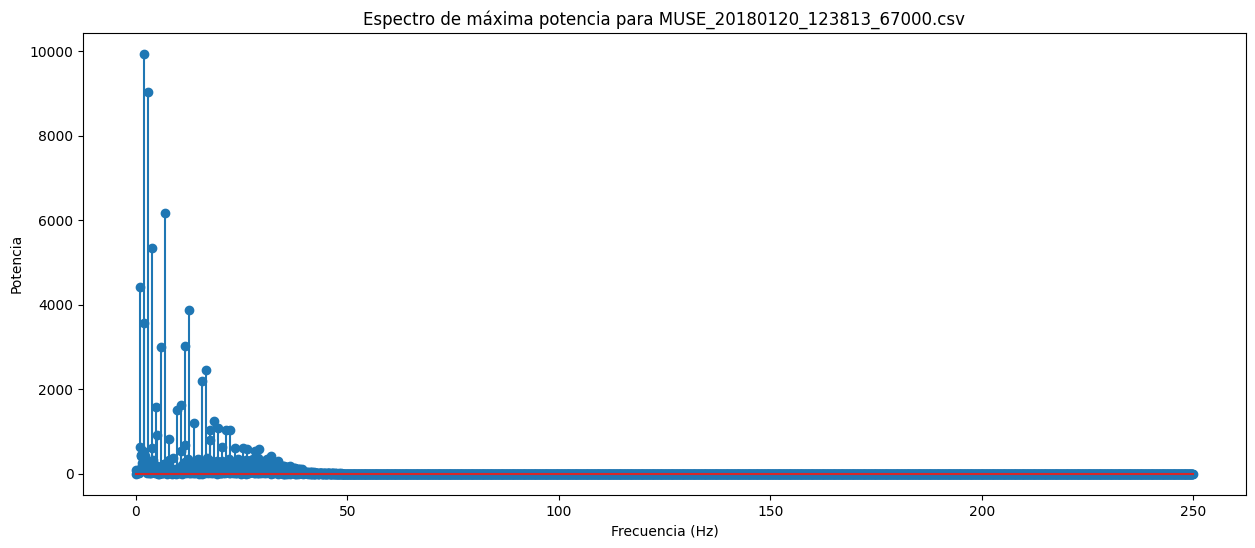

In [ ]:
archivo_especifico = Espectro_SB[Espectro_SB['FileName'] == "MUSE_20180120_123813_67000.csv"]

# Extraer la frecuencia máxima y la potencia para ese archivo
frecuencias = archivo_especifico['Frecuencias'].values[0]
potencias = archivo_especifico['Potencias'].values[0]

plt.figure(figsize=(15, 6))
plt.stem(frecuencias, potencias)
plt.title(f'Espectro de máxima potencia para {archivo_especifico["FileName"].values[0]}')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.show()

La bradicardia sinusal es un ritmo cardíaco caracterizado por una frecuencia regular y ordenada, que es generada por el nodo sinusal, el marcapasos natural del corazón. A diferencia de otros tipos de arritmias, como la fibrilación auricular, la bradicardia sinusal muestra un menor nivel de ruido en el espectro de la señal eléctrica. Esto se debe a la naturaleza más estable y coordinada de los impulsos eléctricos originados en el nodo sinusal [7].


Una característica distintiva de la bradicardia sinusal en el análisis espectral es la presencia de un pico prominente en las frecuencias bajas, que representa la frecuencia dominante del nodo sinusal. Este pico refleja que la actividad eléctrica del corazón está siendo controlada principalmente por este nodo, indicando un ritmo cardíaco regular y coordinado.


## Para sujetos con AFIB



In [ ]:
file_names = []
frecuencia_maxima_potencia_AFIB= []
potencias_AFIB = []
frecuencia_AFIB = []


fs = 500

# Se itera sobre todas las filas del DataFrame original
for idx, row in DataFrameAFIB.iterrows():
    signal = row['II_detrended_compressed']  # Columna con la señal procesada
    frecuencias_AFIB, power_AFIB, freq_max_AFIB = maxima_potencia(signal, fs)

    # Se almacena los resultados en las listas
    file_names.append(row['FileName'])
    frecuencia_maxima_potencia_AFIB.append(freq_max_AFIB)
    potencias_AFIB.append(power_AFIB)
    frecuencia_AFIB.append(frecuencias_AFIB)


Espectro_AFIB = pd.DataFrame({
    'FileName': file_names,
    'Estado': 'AFIB',
    'Frecuencia_maxima_potencia': frecuencia_maxima_potencia_AFIB,

})


Espectro_AFIB[['FileName','Estado', 'Frecuencia_maxima_potencia']]

,FileName,Estado,Frecuencia_maxima_potencia
0,MUSE_20180712_155838_47000...,AFIB,0.4
1,MUSE_20180712_155842_73000...,AFIB,1.6
2,MUSE_20180712_155925_33000...,AFIB,3.7
3,MUSE_20180712_155940_31000...,AFIB,5.1
4,MUSE_20180712_155948_55000...,AFIB,4.5
...,...,...,...
1775,MUSE_20180112_122301_59000...,AFIB,13.9
1776,MUSE_20180112_122302_66000...,AFIB,7.5
1777,MUSE_20180112_122304_77000...,AFIB,4.6
1778,MUSE_20180112_122547_34000...,AFIB,4.4


## Graficación del espectro de máxima potencia para un sujeto con AFIB



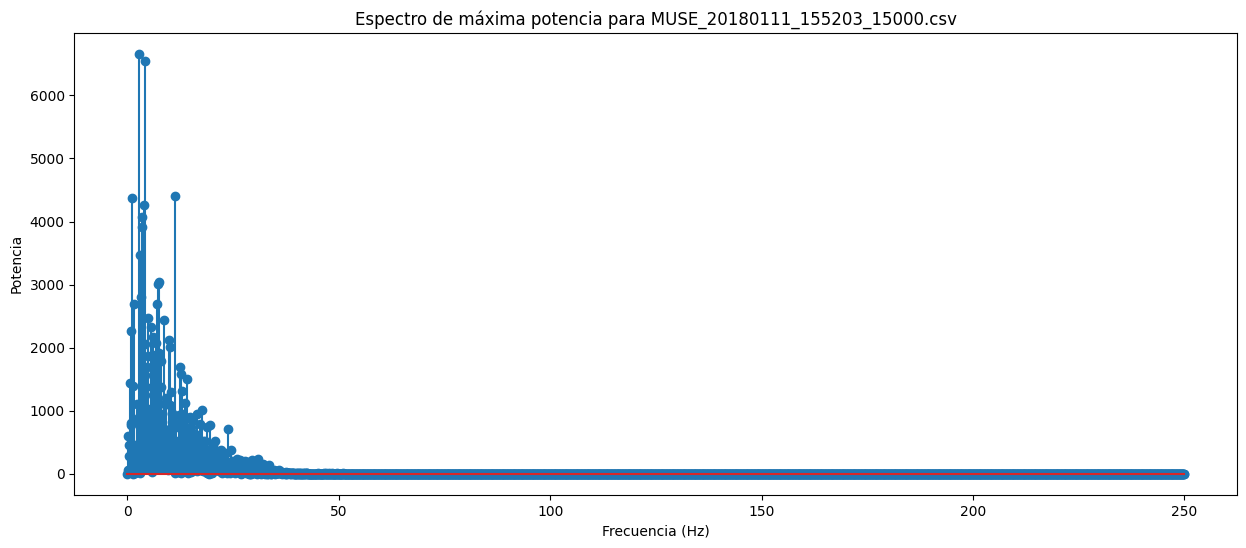

In [ ]:
archivo_especifico = Espectro_AFIB[Espectro_AFIB['FileName'] == "MUSE_20180111_155203_15000.csv"]

# Extraer la frecuencia máxima y la potencia para ese archivo
frecuencias = archivo_especifico['Frecuencias'].values[0]
potencias = archivo_especifico['Potencias'].values[0]

plt.figure(figsize=(15, 6))
plt.stem(frecuencias, potencias)
plt.title(f'Espectro de máxima potencia para {archivo_especifico["FileName"].values[0]}')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia')
plt.show()

La fibrilación auricular (AFib) es un trastorno del ritmo cardíaco caracterizado por una actividad eléctrica irregular y desorganizada en las aurículas, lo que provoca un ritmo cardíaco caótico. Este fenómeno se debe a la existencia de múltiples focos de excitación en las aurículas, que interfieren con el funcionamiento normal del corazón [8].

Una de las características distintivas de la AFib es la presencia de una alta frecuencia dominante en el espectro de la señal eléctrica, visible como el pico más alto en el análisis espectral. Este pico refleja la actividad caótica de las aurículas. A su vez, la heterogeneidad de la actividad eléctrica se evidencia por la aparición de múltiples picos de menor amplitud, lo que indica variabilidad en la excitación auricular, un rasgo típico de la fibrilación auricular [9].

Además, la AFib se manifiesta con múltiples picos de alta frecuencia en el espectro, lo que es indicativo de una actividad eléctrica auricular sumamente desorganizada. En general, el contenido espectral de las señales en pacientes con fibrilación auricular muestra una mayor concentración de frecuencias altas, lo que es un reflejo directo de la actividad irregular de las aurículas.
Esta combinación de alta frecuencia dominante y múltiples picos de frecuencia refuerza el diagnóstico de AFib en los análisis de señales electrocardiográficas (ECG).


## Comparación entre espectros de frecuencia de los sujetos con SB y AFIB graficados

En cuanto a la forma del espectro de las señales electrocardiográficas (ECG), existe una clara distinción entre la bradicardia sinusal y la fibrilación auricular (AFib). Aunque el ancho de banda en ambos casos pueda ser similar, los patrones espectrales muestran diferencias notables.

En la bradicardia sinusal, el espectro se ve más ordenado, con picos bien definidos y concentrados en las frecuencias bajas que corresponden a la frecuencia dominante del nodo sinusal, lo que indica una menor variabilidad en la frecuencia cardíaca.

Por otro lado, en la fibrilación auricular, el espectro es más "ruidoso", caracterizado por la presencia de múltiples picos en diferentes frecuencias. Este desorden refleja la actividad eléctrica caótica y desorganizada de las aurículas, donde múltiples focos de excitación contribuyen a un ritmo irregular. Además, en la AFib, se observa un mayor contenido de frecuencias altas, debido a la alta actividad eléctrica de las aurículas durante la arritmia


### Determinación del umbral para el cálculo del sFSB

In [ ]:
segmento=500
fs=500
umbral = np.sqrt(9.2 / (2 * 10))
umbral

0.6782329983125268

### sFSB para sujetos con SB

In [ ]:
sum_SB = []

for index, row in DataFrameSB.iterrows():

    signal = row['II_detrended_compressed']
    bicoherence = biespectro_bicoherencia(signal, segmento, fs)
    bic_sim_SB = simetria_bicoherencia(bicoherence)
    sum_SB.append(np.sum(bic_sim_SB > umbral))

Espectro_SB['sFSB'] = sum_SB

<ipython-input-37-5f018adbf472>:23: RuntimeWarning: invalid value encountered in divide
  Bicoherencia=np.abs(Biespectro)/B2 #valor absoluto del biespectro dividido por B2 (evitando las contribuciones no coherentes de las frecuencias).
<ipython-input-61-f8e7bd917c11>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  simetria_bicoherencia[f1, f2] = Bicoherencia[f1, f2]


In [ ]:
Espectro_SB[['FileName', 'Estado', 'Frecuencia_maxima_potencia', 'sFSB']]

,FileName,Estado,Frecuencia_maxima_potencia,sFSB
0,MUSE_20180119_173107_52000...,SB,0.8,78
1,MUSE_20180119_173109_64000...,SB,6.7,90
2,MUSE_20180119_173110_69000...,SB,8.5,91
3,MUSE_20180119_173112_86000...,SB,1.7,89
4,MUSE_20180119_173149_13000...,SB,0.9,76
...,...,...,...,...
3884,MUSE_20180112_122630_97000...,SB,3.8,79
3885,MUSE_20180112_122633_06000...,SB,1.0,90
3886,MUSE_20180112_122717_13000...,SB,2.9,90
3887,MUSE_20180112_122719_27000...,SB,2.0,76


### sFSB para sujetos con AFIB

In [ ]:
suma_SB = []

for index, row in DataFrameAFIB.iterrows():

    signal = row['II_detrended_compressed']
    bicoherence = biespectro_bicoherencia(signal, segmento, fs)
    bic_sim_AFIB = simetria_bicoherencia(bicoherence)
    suma_SB.append(np.sum(bic_sim_AFIB > umbral))


Espectro_AFIB['sFSB'] = suma_SB

<ipython-input-37-5f018adbf472>:23: RuntimeWarning: invalid value encountered in divide
  Bicoherencia=np.abs(Biespectro)/B2 #valor absoluto del biespectro dividido por B2 (evitando las contribuciones no coherentes de las frecuencias).
<ipython-input-61-f8e7bd917c11>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  simetria_bicoherencia[f1, f2] = Bicoherencia[f1, f2]


In [ ]:
Espectro_AFIB[['FileName', 'Estado', 'Frecuencia_maxima_potencia', 'sFSB']]

,FileName,Estado,Frecuencia_maxima_potencia,sFSB
0,MUSE_20180712_155838_47000...,AFIB,0.4,91
1,MUSE_20180712_155842_73000...,AFIB,1.6,76
2,MUSE_20180712_155925_33000...,AFIB,3.7,41
3,MUSE_20180712_155940_31000...,AFIB,5.1,63
4,MUSE_20180712_155948_55000...,AFIB,4.5,69
...,...,...,...,...
1775,MUSE_20180112_122301_59000...,AFIB,13.9,52
1776,MUSE_20180112_122302_66000...,AFIB,7.5,68
1777,MUSE_20180112_122304_77000...,AFIB,4.6,61
1778,MUSE_20180112_122547_34000...,AFIB,4.4,59


In [118]:
DataFrame_Final = pd.concat([Espectro_AFIB, Espectro_SB], axis=0, ignore_index=True)
DataFrame_Final = DataFrame_Final.rename(columns={'Frecuencia_maxima_potencia': 'fMP'})
pd.set_option('display.max_rows', None)  #Mostrar todas las filas
pd.set_option('display.max_columns', None)  #Mostrar todas las columnas
pd.set_option('display.width', None)  # Ajustar el ancho de la pantalla automáticamente
pd.set_option('display.max_colwidth', None)
DataFrame_Final

,FileName,Estado,fMP,sFSB
0,MUSE_20180712_155838_47000.csv,AFIB,0.400000,91
1,MUSE_20180712_155842_73000.csv,AFIB,1.600000,76
2,MUSE_20180712_155925_33000.csv,AFIB,3.700000,41
3,MUSE_20180712_155940_31000.csv,AFIB,5.100000,63
4,MUSE_20180712_155948_55000.csv,AFIB,4.500000,69
5,MUSE_20180712_155949_63000.csv,AFIB,3.000000,77
6,MUSE_20180712_155950_69000.csv,AFIB,1.200000,97
7,MUSE_20180712_155951_75000.csv,AFIB,6.000000,83
8,MUSE_20180712_160000_27000.csv,AFIB,3.100000,78
9,MUSE_20180712_160002_41000.csv,AFIB,8.000000,66


## **Análisis estadístico**

## Diagrama de caja y bigotes

<ipython-input-98-7a67499c2e31>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Estado', y='fMP', data=DataFrame_Final, ax=axes[0], palette=palette)
<ipython-input-98-7a67499c2e31>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Estado', y='sFSB', data=DataFrame_Final, ax=axes[1], palette=palette)


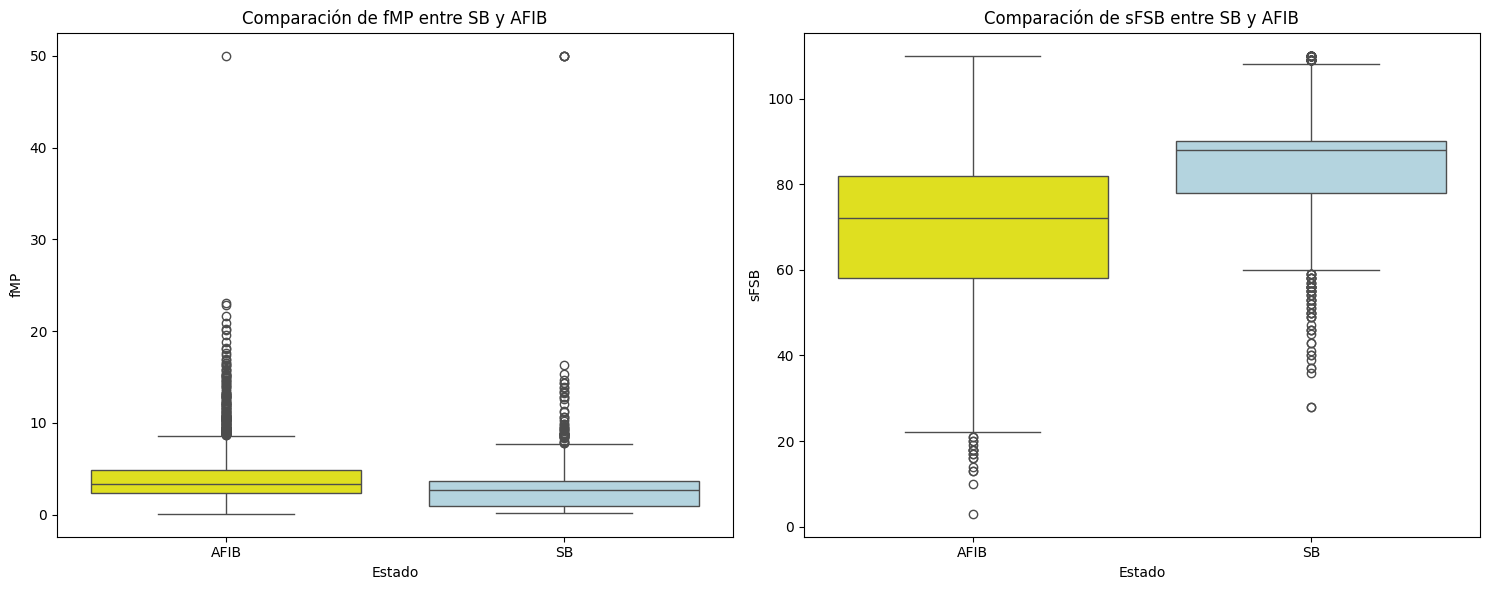

In [ ]:
import seaborn as sns


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

palette = {'SB': 'lightblue', 'AFIB': 'yellow'}

# Boxplot para 'fMP' en el primer subplot
sns.boxplot(x='Estado', y='fMP', data=DataFrame_Final, ax=axes[0], palette=palette)
axes[0].set_title('Comparación de fMP entre SB y AFIB')
axes[0].set_xlabel('Estado')
axes[0].set_ylabel('fMP')

# Boxplot para 'sFSB' en el segundo subplot
sns.boxplot(x='Estado', y='sFSB', data=DataFrame_Final, ax=axes[1], palette=palette)
axes[1].set_title('Comparación de sFSB entre SB y AFIB')
axes[1].set_xlabel('Estado')
axes[1].set_ylabel('sFSB')

plt.tight_layout()
plt.show()

**Frecuencia de Máxima Potencia (fMP)**

La frecuencia de máxima potencia (fMP) muestra diferencias entre los dos estados, SB (Bradicardia Sinusal) y AFIB (Fibrilación Auricular):

*	El rango intercuartil (IQR), que representa el 50% central de los datos, es similar entre ambos estados, aunque parece ser ligeramente más alto en AFIB.
*	La mediana de fMP es también ligeramente superior en AFIB en comparación con SB, lo que indica que, en promedio, las frecuencias de máxima potencia tienden a ser más elevadas en pacientes con fibrilación auricular.
*	Se observa una gran cantidad de valores atípicos (outliers) por encima del tercer cuartil en ambos grupos, lo que sugiere una dispersión considerable en las frecuencias más altas, especialmente en AFIB.

En conclusión, se tiene que, La fMP es mayor en AFIB, lo cual tiene una lógica fisiológica, ya que la fibrilación auricular está asociada con ritmos cardíacos más rápidos e irregulares, mientras que la bradicardia sinusal presenta un ritmo más lento. Aunque se puede identificar una clara tendencia, los valores más extremos en ambos grupos sugieren que existe una notable variabilidad entre los pacientes.

**Suma de Frecuencias Significativas en Bicoherencia (sFSB)**

El análisis de la suma de frecuencias significativas en bicoherencia (sFSB) también muestra diferencias entre los estados:

* En SB, la mediana es relativamente alta y el IQR es más compacto, lo que indica que los valores de sFSB tienden a estar más concentrados y estructurados.
*	En AFIB, se observa una mayor dispersión de los datos, reflejada en un IQR más amplio. Aunque la mediana de AFIB es ligeramente inferior a la de SB, sigue estando cerca de los valores superiores de SB.
*	Los valores atípicos en SB son más numerosos y se concentran en la parte baja, lo que sugiere que en algunos casos la bicoherencia es significativamente menor.

Entonces, se concluye que la sFSB es mayor en SB, lo que sugiere que la señal en los pacientes con bradicardia sinusal es más coherente y estructurada. En contraste, en los pacientes con fibrilación auricular, la falta de coherencia en las ondas cardiacas parece reducir esta métrica. Los valores atípicos en SB indican que, en ciertos casos, la bicoherencia puede ser considerablemente más baja de lo esperado, posiblemente debido a características particulares del ECG en esos pacientes.


## Pruebas de hipótesis

El análisis de las pruebas de hipótesis permite tomas decisiones estadísticas basadas en datos, con el fin de determinar si los resultados observados son significativos.

La prueba de normalidad de realizó mediante la **prueba de Kolmogorov-Smirnov** debido a que se trabajaron grupos caracterizados por tener más de 50 muestras [10]. esta prueba fue realizada para las 4 posibles combinaciones (fMP - SB, fMP - AFIB, sFSB - SB, sFSB - AFIB), teniendo en cuenta las siguientes hipótesis:

* Ho: Los datos presentan una distribución normal. No se rechaza Ho.
* Ha: Los datos no presentan una distribución normal. Se rechaza Ho.

Seguidamente, se realizó la **prueba de homocedasticidad de Levene** para verificar si varios grupos de datos tienen varianzas iguales. Esta prueba es más robusta que otras pruebas de homocedasticidad (como la prueba de Bartlett) cuando los datos no siguen una distribución normal, lo que la hace adecuada para este análisis [11]. Esta prueba fue realizada para comparar las poblaciones de estudio (AFIB y SB) según la métrica evaluada (sFSB o fMP), teniendo en cuenta las siguientes hipótesis:

* Ho: Los grupos SB y AFIB tienen varianzas iguales en términos de sFSB/fMP. No se puede rechazar Ho.
* Ha: Los grupos SB y AFIB tienen varianzas diferentes en términos de sFSB o fMP. Se rechaza Ho.

**Independencia:** Se asume que los grupos son independientes.

Por último, como no se cumple el supuesto de normalidad para ningún caso, y no se cumplen los de homocedasticidad en muchos casos, se opta por la realización de pruebas no paramétricas, en este caso, se emplea la **Prueba U de Mann-Whitney** para comparar si hay diferencias significativas entre las distribuciones de dos grupos independientes.  A diferencia de pruebas paramétricas como el t-test, la prueba de Mann-Whitney no requiere que los datos sigan una distribución normal, lo que la hace adecuada para este análisis [12]. Esta prueba fue realizada para comparar las poblaciones de estudio (AFIB y SB) según la métrica evaluada (sFSB o fMP), teniendo en cuenta las siguientes hipótesis:

* Ho: Hay diferencias significativas en la tendencia central de fMP/sFSB entre las poblaciones AFIB y SB. No se rechaza Ho.
* Ha: No hay diferencias significativas en la tendencia central de fMP/sFSB entre las poblaciones AFIB y SB. Se rechaza Ho.

In [109]:
import scipy.stats as stats
from scipy.stats import kstest, levene, mannwhitneyu, ttest_ind

# Separar los datos por Estado
sb_data = DataFrame_Final[DataFrame_Final['Estado'] == 'SB']
afib_data = DataFrame_Final[DataFrame_Final['Estado'] == 'AFIB']

# Prueba de Kolmogorov - Smirnov (normalidad)
print("Resultados de las pruebas de Kolmogorov-Smirnov (Normalidad):")

# Frecuencia máxima de potencia
kolmogorov_sb_fmp = kstest(sb_data['fMP'], 'norm')
print("SB - Frecuencia máxima de potencia:")
if kolmogorov_sb_fmp.pvalue < 0.05:
    print(f"Los datos de fMP en SB no distribuyen normal (p-value = {kolmogorov_sb_fmp.pvalue:.4f}).\n")
else:
    print(f"Conclusión: Los datos de fMP en SB distribuyen normal (p-value = {kolmogorov_sb_fmp.pvalue:.4f}).\n")

kolmogorov_afib_fmp = kstest(afib_data['fMP'], 'norm')
print("AFIB - Frecuencia máxima de potencia:")
if kolmogorov_afib_fmp.pvalue < 0.05:
    print(f"Los datos de fMP en AFIB no distribuyen normal (p-value = {kolmogorov_afib_fmp.pvalue:.4f}).\n")
else:
    print(f"Los datos de fMP en AFIB distribuyen normal (p-value = {kolmogorov_afib_fmp.pvalue:.4f}).\n")

# sFBS
kolmogorov_sb_sFSB = kstest(sb_data['sFSB'], 'norm')
print("SB - sFBS:")
if kolmogorov_sb_sFSB.pvalue < 0.05:
    print(f"Los datos de sFBS en SB no distribuyen normal (p-value = {kolmogorov_sb_sFSB.pvalue:.4f}).\n")
else:
    print(f"Los datos de sFBS en SB distribuyen normal (p-value = {kolmogorov_sb_sFSB.pvalue:.4f}).\n")

kolmogorov_afib_sFSB = kstest(afib_data['sFSB'], 'norm')
print("AFIB - sFBS:")
if kolmogorov_afib_sFSB.pvalue < 0.05:
    print(f"Los datos de sFBS en AFIB no distribuyen normal (p-value = {kolmogorov_afib_sFSB.pvalue:.4f}).\n")
else:
    print(f"Los datos de sFBS en AFIB distribuyen normales (p-value = {kolmogorov_afib_sFSB.pvalue:.4f}).\n")

# Prueba de Levene - Igualdad de varianzas
print(' ')
print("Resultados de las pruebas de Levene (Igualdad de varianzas):")

levene_fmp = levene(sb_data['fMP'], afib_data['fMP'])
print("fMP entre SB y AFIB:")
if levene_fmp.pvalue < 0.05:
    print(f"Las varianzas de fMP no son iguales entre AFIB y SB (p-value = {levene_fmp.pvalue:.4f}).\n")
else:
    print(f"Las varianzas de fMP son iguales entre AFIB y SB (p-value = {levene_fmp.pvalue:.4f}).\n")

levene_sFSB = levene(sb_data['sFSB'], afib_data['sFSB'])
print("sFBS entre SB y AFIB:")
if levene_sFSB.pvalue < 0.05:
    print(f"Las varianzas de sFBS no son iguales entre AFIB y SB (p-value = {levene_sFSB.pvalue:.4f}).\n")
else:
    print(f"Las varianzas de sFBS son iguales entre AFIB y SB (p-value = {levene_sFSB.pvalue:.4f}).\n")

# Prueba U de Mann-Whitney o t-student según el resultado de normalidad
print(' ')
print("Resultados de las pruebas de comparación de medias/distribuciones:")

# Función auxiliar para determinar si la normalidad se cumple según Kolmogorov (p > 0.05)
def is_normal(test_result):
    return test_result.pvalue > 0.05

# Frecuencia máxima de potencia
if is_normal(kolmogorov_sb_fmp) and is_normal(kolmogorov_afib_fmp):
    # Prueba t-student
    ttest_fmp = ttest_ind(sb_data['fMP'], afib_data['fMP'])
    print("Prueba T-Student - fMP:")
    print(ttest_fmp)
    if ttest_fmp.pvalue < 0.05:
        print(f"Hay una diferencia significativa en la fMP entre SB y AFIB (p-value = {ttest_fmp.pvalue:.4f}). Se rechaza la hipótesis nula.\n")
    else:
        print(f"No hay diferencia significativa en la fMP entre SB y AFIB (p-value = {ttest_fmp.pvalue:.4f}). No se rechaza la hipótesis nula.\n")
else:
    # Prueba U de Mann-Whitney
    mannwhitney_fmp = mannwhitneyu(sb_data['fMP'], afib_data['fMP'])
    print("Prueba U - fMP entre SB y AFIB:")
    print(mannwhitney_fmp)
    if mannwhitney_fmp.pvalue < 0.05:
        print(f"Hay diferencia significativa en la fMP entre SB y AFIB (p-value = {mannwhitney_fmp.pvalue:.4f}). Se rechaza la hipótesis nula.\n")
    else:
        print(f"No hay diferencia significativa en la fMP entre SB y AFIB (p-value = {mannwhitney_fmp.pvalue:.4f}). No se rechaza la hipótesis nula.\n")

# sFBS
if is_normal(kolmogorov_sb_sFSB) and is_normal(kolmogorov_afib_sFSB):
    # Prueba t-student
    ttest_sFSB = ttest_ind(sb_data['sFSB'], afib_data['sFSB'])
    print("Prueba T-Student - sFBS:")
    print(ttest_sFSB)
    if ttest_sFSB.pvalue < 0.05:
        print(f"Hay una diferencia significativa en sFBS entre SB y AFIB (p-value = {ttest_sFSB.pvalue:.4f}). Se rechaza la hipótesis nula.\n")
    else:
        print(f"No hay diferencia significativa en sFBS entre SB y AFIB (p-value = {ttest_sFSB.pvalue:.4f}). No se rechaza la hipótesis nula.\n")
else:
    # Prueba U de Mann-Whitney
    mannwhitney_sFSB = mannwhitneyu(sb_data['sFSB'], afib_data['sFSB'])
    print("Prueba U - sFBS entre SB y AFIB:")
    print(mannwhitney_sFSB)
    if mannwhitney_sFSB.pvalue < 0.05:
        print(f"Hay una diferencia significativa en sFBS entre SB y AFIB (p-value = {mannwhitney_sFSB.pvalue:.4f}). Se rechaza la hipótesis nula.\n")
    else:
        print(f"No hay diferencia significativa en sFBS entre SB y AFIB (p-value = {mannwhitney_sFSB.pvalue:.4f}). No se rechaza la hipótesis nula.\n")

Resultados de las pruebas de Kolmogorov-Smirnov (Normalidad):
SB - Frecuencia máxima de potencia:
Los datos de fMP en SB no distribuyen normal (p-value = 0.0000).

AFIB - Frecuencia máxima de potencia:
Los datos de fMP en AFIB no distribuyen normal (p-value = 0.0000).

SB - sFBS:
Los datos de sFBS en SB no distribuyen normal (p-value = 0.0000).

AFIB - sFBS:
Los datos de sFBS en AFIB no distribuyen normal (p-value = 0.0000).

 
Resultados de las pruebas de Levene (Igualdad de varianzas):
fMP entre SB y AFIB:
Las varianzas de fMP no son iguales entre AFIB y SB (p-value = 0.0000).

sFBS entre SB y AFIB:
Las varianzas de sFBS no son iguales entre AFIB y SB (p-value = 0.0000).

 
Resultados de las pruebas de comparación de medias/distribuciones:
Prueba U - fMP entre SB y AFIB:
MannwhitneyuResult(statistic=2141031.5, pvalue=2.8670168849961355e-118)
Hay diferencia significativa en la fMP entre SB y AFIB (p-value = 0.0000). Se rechaza la hipótesis nula.

Prueba U - sFBS entre SB y AFIB:
Mannw

### **1. Normalidad:**
Los resultados muestran que ninguna de las variables evaluadas sigue una distribución normal. Esto implica que los métodos estadísticos paramétricos tradicionales no son apropiados para realizar comparaciones entre los grupos. En su lugar, se utilizan pruebas no paramétricas, como la prueba U de Mann-Whitney.

### **2. Homocedasticidad:**

Hay diferencias significativas en la varianza para fMP y sFSB entre los grupos AFIB y SB, lo cual indica que la dispersión de los valores de ambas variables no es la misma entre los grupos. Por ejemplo, el grupo AFIB puede mostrar una mayor variabilidad en la frecuencia de máxima de potencia o en la métrica sFSB, mientras que el grupo SB puede tener valores más concentrados o menos dispersos, como se discutió anteriormente.

Estas diferencias en la variabilidad indican que la actividad eléctrica cardíaca en los sujetos con AFIB es difernete a la de los sujetos con SB.


### **3. Prueba U de Mann Whitney:**

Las diferencias observadas en las medianas o tendencias (tanto en fMP como en sFSB) entre los grupos AFIB y SB confirman que los dos grupos **se comportan de manera distinta en términos de sus patrones eléctricos cardíacos.** Esto sugiere que AFIB y SB no solo difieren en la dispersión de los datos, sino también en la posición central o tendencia de sus distribuciones.



## Identificar si hay diferencias estadísticas entre las características espectrales enocntradas para las dos poblaciones de estudio

**Frecuencia Máxima de Potencia (fMP):**

La mayor varianza en fMP para el grupo AFIB refleja una actividad eléctrica más caótica o impredecible, lo cual es consistente con la naturaleza de esta arritmia, caracterizada por impulsos irregulares y rápidos. Por otro lado, el grupo SB, al tener menos variabilidad, probablemente presenta una actividad eléctrica más regulada y predecible.
   
**sFBS:**

La varianza en los valores de sFSB también puede revelar diferencias en la dinámica del ritmo cardíaco entre ambos grupos. En los sujetos con AFIB, donde los ritmos cardíacos son más irregulares, podríamos esperar una mayor dispersión en esta métrica, como se puede ver en el BoxPlot.

Las diferencias significativas tanto en la tendencia como en la dispersión entre los grupos AFIB y SB refuerzan la idea de que estas dos condiciones cardíacas se manifiestan de manera distinta, tanto en su comportamiento central como en su variabilidad. Esto no solo contribuye a una mejor comprensión de las arritmias, sino que también puede tener aplicaciones clínicas relevantes para el diagnóstico y tratamiento. Un médico podría utilizar estas diferencias para identificar la presencia de AFIB basándose en las variaciones observadas en parámetros como fMP y sFSB, diferenciando así entre ambas condiciones de forma más precisa.

## Conclusiones

El análisis espectral y de bicoherencia ofrecen herramientas potentes para estudiar las diferencias en la actividad eléctrica cardíaca entre ritmos cardíacos normales y anómalos, como la bradicardia sinusal y la fibrilación auricular. Estas metodologías podrían contribuir al desarrollo de nuevas estrategias de diagnóstico que faciliten la identificación temprana y el tratamiento adecuado de las arritmias cardíacas.

El mapa de bicoherencia proporcionó una visualización de las interacciones entre las diferentes frecuencias en las señales ECG, revelando diferencias clave entre los dos estados que pueden ser utilizadas para desarrollar herramientas de diagnóstico más precisas y sensibles para distinguir entre ritmos normales y anómalos en pacientes. La capacidad de identificar patrones de coherencia en tiempo real puede facilitar la detección temprana de eventos como la fibrilación auricular, que puede ser asintomática en sus primeras fases.

Los resultados de la Prueba U de Mann Whitney sugieren que las diferencias entre SB y AFib no son aleatorias, sino que reflejan variaciones fisiológicas reales en las señales de ECG que son relevantes para la caracterización de cada condición, y podrían servir para mejorar las herramientas de diagnóstico para la fibrilación auricular, que es una de las arritmias más comunes y potencialmente peligrosas si no se detecta a tiempo.


## Referencias

[1] Zheng, J., Chu, H., & Struppa, D. (2020, 19 de febrero). Optimal multi-stage arrhythmia classification approach - scientific reports. Nature. https://www.nature.com/articles/s41598-020-59821-7

[2] Gadaleta, M. (2023, 12 de diciembre). Prediction of atrial fibrillation from at-home single-lead ECG signals without arrhythmias - npj Digital Medicine. Nature. https://www.nature.com/articles/s41746-023-00966-w

[3] Liu, L. R., Huang, M. Y., Huang, S. T., Kung, L. C., Lee, C. hsiung, Yao, W. T., Tsai, M. F., Hsu, C. H., Chu, Y. C., Hung, F. H., & Chiu, H. W. (2024). An Arrhythmia classification approach via deep learning using single-lead ECG without QRS wave detection. Heliyon, 10(5), e27200. https://doi.org/10.1016/J.HELIYON.2024.E27200

[4] Atri, R., & Mohebbi, M. (2015). Obstructive sleep apnea detection using spectrum and bispectrum analysis of single-lead ECG signal. Physiological Measurement, 36(9), 1963. https://doi.org/10.1088/0967-3334/36/9/1963

[5] detrend — Manual de SciPy v1.14.1. (n.d.). Retrieved October 19, 2024, from https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html

[6] Muñoz Marí, J. (1997, febrero). Compresión de ecg en tiempo real con el dsp tms320c25. Universitat de València. https://www.uv.es/jordi/pdf/tesina.pdf

[7] Pacheco, L., & Azucena, L. (2024, 15 de marzo). Vista de Bradicardia sinusal: Caso clínico. MQRInvestigar. https://www.investigarmqr.com/ojs/index.php/mqr/article/view/984/3731

[8] Acosta Tiburcio, Y. R. (2017). Validez diagnóstica del sistema kardia Mobile Microlife y hallazgos ecocardiográficos en pacientes con fibrilación auricular en el servicio de cardiología del Hospital Dr. Salvador B. Gautier septiembre 2016 - agosto 2017. Tesis de Grado. https://repositorio.unphu.edu.do/handle/123456789/780

[9] (s.f.). Advancing Science for Life - US - Boston Scientific. https://www.bostonscientific.com/content/dam/Boston%20Scientific%20Latam/Enfermedades/arritmias-auriculares/SH-351201-AA%20Understanding%20Afib%20Patient%20Brochure.ES.pdf

[10] RPubs - Prueba de normalidad de Shapiro-Wilk. (s.f.). RPubs. https://rpubs.com/F3rnando/507482

[11] T-Test, chi-square, ANOVA, regression, correlation... (s.f.). Calculadora estadí­stica en línea: Pruebas de hipótesis, prueba t, chi-cuadrado, regresión, correlación, análisis de varianza, análisis de conglomerados. https://datatab.es/tutorial/levene-test

[12] SPSS statistics subscription - early access. (s.f.). IBM - United States. https://www.ibm.com/docs/es/spss-statistics/beta?topic=tests-mann-whitney-u-test
